# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Capstone Project


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Capstone Overview


## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> Objective:

- To undertake a multi-faceted project that demonstrates your understanding and mastery of the key conceptual and technological aspects of Deep Learning.
- To develop an understanding of how challenging human-level problems can be approached and solved using a combination of tools and techniques.
- To understand current scenarios in deep learning, understand the practicalities and the trade-offs that need to be made when solving a problem in real life.
  ###Milestones:

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> This project has 2 milestones.

You get 3 weeks for completing each milestone.
The 1st milestone should be submitted as part of the interim report.

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 1st Milestone:

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 1. Problem interpretation

- Understand the data
- Make an abstract or an overview based on your approach
- Break the problem into smaller tasks
- Discuss among your teammates and share responsibilities

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 2. Data analysis and preprocessing:

Visual displays are powerful when used well, so think carefully about the information the display.

- Include any insightful visualization
- Share and explain particularly meaningful features, interactions or summary of data
- Display examples to input in your model
- Explain changes to be incorporated into data so that it becomes ready for the model

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 3. Modeling

- What kind of neural network you have used and why?
- What progress you have made towards your intended solution?


### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> 2nd Milestone

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 4. Model evaluation

- Describe how you will proceed with the analysis
- Compare different models and choose which model to use
- Do hyper-parameter tuning of your model
- How will you build on your initial analysis to increase the accuracy of your model?

## <span style="font-family: Arial; font-weight:normal;font-size:0.5em;color:#0e92ea"> 5. Presentation and Report

- You should start preparing the final report at least 2 weeks prior to the project completion date.
- Teams should send a draft Last of the project before the last session to the mentor and get the necessary inputs for submission.
- The expectations for the final report will be included in your Capstone course page


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
import cv2
import math
from skimage import measure
from skimage.transform import resize
from glob import glob

In [3]:
#csv files
class_info = pd.read_csv('stage_2_detailed_class_info.csv')
train_labels = pd.read_csv('stage_2_train_labels.csv')

In [4]:
# Path
os.chdir(PATH)

TRAIN_IMAGES = os.path.join(PATH, 'stage_2_train_images\\')
TEST_IMAGES = os.path.join(PATH, 'stage_2_test_images\\')

# Output files will be stored here
OUTPUT_DIR = os.path.join(PATH, 'output\\')

In [10]:
print('Train labels dataframe:\n'); 
train_labels.head()

Train labels dataframe:



,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [11]:
print('Train labels info:\n'); 
train_labels.info()

Train labels info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [12]:
print('\nClass info dataframe:\n'); 
class_info.head()


Class info dataframe:



,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [23]:
print(f'Shape of the Train Labels dataframe: {train_labels.shape[0]} rows and {train_labels.shape[1]} columns')
print(f'Shape of the Class info dataframe: {class_info.shape[0]} rows and {class_info.shape[1]} columns')

Shape of the Train Labels dataframe: 30227 rows and 6 columns
Shape of the Class info dataframe: 30227 rows and 2 columns


In [24]:
print('Number of duplicates in Train Labels dataframe: {}'.format(len(train_labels) - (train_labels['patientId'].nunique())))
print('Number of duplicates in Class info dataframe: {}'.format(len(class_info) - (class_info['patientId'].nunique())))

Number of duplicates in Train Labels dataframe: 3543
Number of duplicates in Class info dataframe: 3543


In [25]:
print('Number of unique records in Train Labels dataframe: {}'.format(train_labels['patientId'].nunique()))
print('Number of unique records in Class info dataframe: {}'.format(class_info['patientId'].nunique()))

Number of unique records in Train Labels dataframe: 26684
Number of unique records in Class info dataframe: 26684


In [30]:
print('Nulls in bounding boxes: {}'.format(train_labels[['x', 'y', 'width', 'height']].isnull().sum().to_dict())) 

Nulls in bounding boxes: {'x': 20672, 'y': 20672, 'width': 20672, 'height': 20672}


In [31]:
print('Null value counts for the targets: {}'.format(train_labels['Target'].value_counts().to_dict()))

Null value counts for the targets: {0: 20672, 1: 9555}


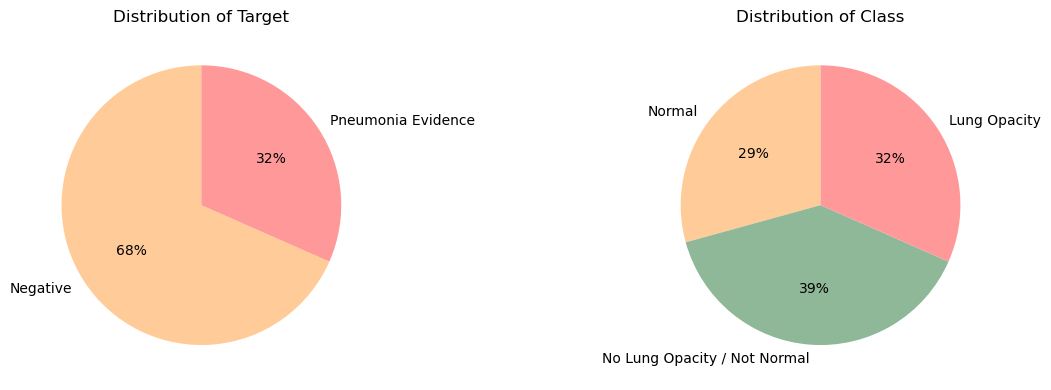

In [32]:
fig = plt.figure(figsize = (12, 4))

ax = fig.add_subplot(121)
g = (train_labels['Target'].value_counts()
    .plot(kind = 'pie', autopct = '%.0f%%', 
          labels = ['Negative', 'Pneumonia Evidence'], 
          colors = ['#ffcc99', '#ff9999'], 
          startangle = 90, 
          title = 'Distribution of Target', fontsize = 10)
    .set_ylabel(''))

ax = fig.add_subplot(122)
g = (class_info['class'].value_counts().sort_index(ascending = False)
    .plot(kind = 'pie', autopct = '%.0f%%', 
          colors = ['#ffcc99', '#8EB897', '#ff9999'], 
          startangle = 90, title = 'Distribution of Class', 
          fontsize = 10)
    .set_ylabel(''))

plt.tight_layout()

In [33]:
bboxes = train_labels.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
train_labels = train_labels.merge(bboxes, on = 'patientId', how = 'left')

(bboxes.groupby('number_of_boxes').size().to_frame('number_of_patientIDs_per_boxes').reset_index()
.set_index('number_of_boxes')
.sort_values(by = 'number_of_boxes'))

,number_of_patientIDs_per_boxes
number_of_boxes,
1,23286
2,3266
3,119
4,13


In [35]:
train_labels[train_labels.patientId=='000fe35a-2649-43d4-b027-e67796d412e0']

,patientId,x,y,width,height,Target,number_of_boxes
28992,000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1,2
28993,000fe35a-2649-43d4-b027-e67796d412e0,83.0,227.0,296.0,438.0,1,2


In [39]:
class_info[class_info.patientId=='e6ef7f43-4c94-4999-9ec0-f341312f70a2']

,patientId,class
25836,e6ef7f43-4c94-4999-9ec0-f341312f70a2,Normal


In [41]:
print('Each patientId is associated with only {} class'.format(class_info.groupby(['patientId'])['class'].nunique().max()))

Each patientId is associated with only 1 class


In [42]:
train_class = pd.concat([train_labels, class_info['class']], axis = 1)
print('Shape of the dataframe after the merge: {}'.format(train_class.shape))
print('Shape of the dataframe with unique records after the merge: {}'.format(train_class['patientId'].nunique()))

Shape of the dataframe after the merge: (30227, 8)
Shape of the dataframe with unique records after the merge: 26684


In [47]:
images = pd.DataFrame({'path': glob(os.path.join(TRAIN_IMAGES, '*.dcm'))})
images['patientId'] = images['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])

print('Number of images in the training folder: {}'.format(images.shape[0]))
print('Columns in the training images dataframe: {}'.format(list(images.columns)))

assert images.shape[0] == len(list(set(train_class['patientId']))), 'Number of training images should be equal to the unique patientIds we have'

Number of images in the training folder: 26684
Columns in the training images dataframe: ['path', 'patientId']


In [48]:
train_class = train_class.merge(images, on = 'patientId', how = 'left')
print('Shape of the train_class dataframe after merge: {}'.format(train_class.shape))
del images

Shape of the train_class dataframe after merge: (30227, 9)
